# How well do jobs and skills pay for Data Engineers?

#### Methodology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Engineers
3. Visualize for highest paying skills and most demanded skills


## Import Libraries and Data

In [ ]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Salary Distrubition by Job Title

Filter the data to only include salary values from Germany.

In [2]:
df_GR = df[(df['job_country'] == 'Germany')].dropna(subset=['salary_year_avg'])

Create a list of the main job_titles in our dataset and filter our dataframe to only contain these job titles.

In [3]:
job_titles = df_GR['job_title_short'].value_counts().index[:6].to_list()

df_GR_top6 = df_GR[df_GR['job_title_short'].isin(job_titles)]

job_order = df_GR_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Data Analyst',
 'Data Scientist',
 'Data Engineer',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Senior Data Scientist']

## Plot Salary Distrubitions

Plot the top 6 job titles salary distrubitions using a box plot.

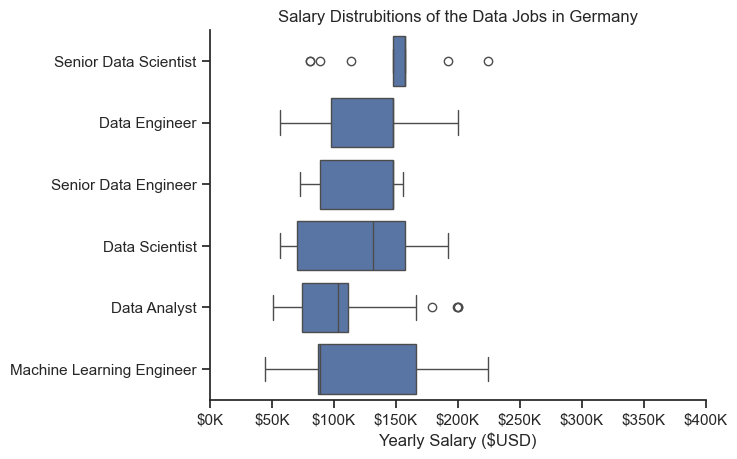

In [5]:
sns.boxplot(data=df_GR_top6,x='salary_year_avg',y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Salary Distrubitions of the Data Jobs in Germany')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 400000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()